In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv("filename", header=None, index_col=False, 
                  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
 'marital-status', 'occupation', 'relationship', 'race', 'gender',
 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
 'income'])
#for illustration puropses we include only some features
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
 'occupation', 'income']]
display(data.head())

#as the file was not downloaded output:

# age workclass     education               gender hours-per-week  occupation        income
# 0    39      State-gov Bachelors           Male       40        Adm-clerical       <=50K
# 1    50      Self-emp-not-inc Bachelors    Male       13        Exec-managerial    <=50K
# 2    38      Private HS-grad               Male       40        Handlers-cleaners  <=50K
# 3    53      Private 11th                  Male       40        Handlers-cleaners  <=50K
# 4    28      Private Bachelors            Female      40        Prof-specialty     <=50K

#checking string encoded categorical data

print(data.gender.value_counts())

#output will be

#  Male 21790
#  Female 10771
# Name: gender, dtype: int64

print("Original features:{}".format(list(data.columns)))
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:{}".format(list(data_dummies.columns)))

#output will be
# Original features:
#  ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation',
#  'income']
# Features after get_dummies:
#  ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
#  'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
#  'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
#  'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
#  'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
#  ...
#  'education_ Preschool', 'education_ Prof-school', 'education_ Some-college',
#  'gender_ Female', 'gender_ Male', 'occupation_ ?',
#  'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
#  'occupation_ Craft-repair', 'occupation_ Exec-managerial',
#  'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
#  ...
#  'occupation_ Tech-support', 'occupation_ Transport-moving',
#  'income_ <=50K', 'income_ >50K']

#get_dummies method will transform only string encoded categorical data

data_dummies.head()

#output will be
# age hoursperweek
# workclass_ ? workclass_
# Federalgov
# workclass_
# Local-gov
# … occupation_
# Tech support occupation_Transport moving income_<=50K income_>50K
# 0 39 40 0.0 0.0 0.0 … 0.0 0.0 1.0 0.0
# 1 50 13 0.0 0.0 0.0 … 0.0 0.0 1.0 0.0
# 2 38 40 0.0 0.0 0.0 … 0.0 0.0 1.0 0.0
# 3 53 40 0.0 0.0 0.0 … 0.0 0.0 1.0 0.0
# 4 28 40 0.0 0.0 0.0 … 0.0 0.0 1.0 0.0

features = data_dummies.ix[:, 'age':'occupation_transport moving']
#extract numpy arrays
X = features.values
y = data_dummies['income_>=50K'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Test set accuracy:{}".format(logreg.score(X_test, y_test)))

#output will be 
# Test set accuracy: 0.81

In [4]:
import pandas as pd

demo_df = pd.DataFrame({'Integer Feature':[0, 1, 2, 1], 'Categorical Feature':['socks', 'fox', 'socks', 'box']})

display(demo_df)

pd.get_dummies(demo_df)

demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


bins:[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

                                         Data points  \
0  [[-0.752759286915825], [2.704285838459497], [1...   

                   Bin member  
0  [[4], [10], [8], [6], [2]]  
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
line_binned:[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


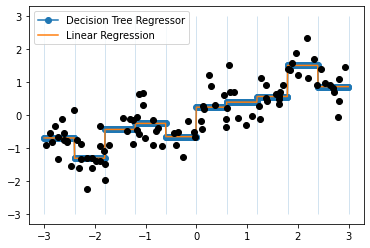

In [45]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

# reg=DecisionTreeRegressor(min_samples_split=3)
# reg.fit(X, y)
# plt.plot(X[:, 0], y, 'o', c='k')
# plt.plot(line, reg.predict(line), label='decision tree')

# logreg = LinearRegression()
# logreg.fit(X, y)
# plt.plot(line, logreg.predict(line), label='linear regression')
# plt.legend(loc='best')
# plt.xlabel("Input features")
# plt.ylabel("Regression output")

bins = np.linspace(-3, 3, 11)
print("bins:{}\n".format(bins))

which_bin = np.digitize(X, bins=bins)

example_df = pd.DataFrame({'Data points':[X[:5]], 'Bin member':[which_bin[:5]]})
print(example_df)

#transform using the onehotencoder

encoder = OneHotEncoder(sparse=False)
#encoder.fit method finds the unique values in which_bins
encoder.fit(which_bin)
#the transform method creates the one hot encoder
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

reg = DecisionTreeRegressor(min_samples_split=3, random_state=0)
reg.fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='Decision Tree Regressor', marker='o')

line_binned = encoder.transform(np.digitize(line, bins=bins))
print("line_binned:{}".format(line_binned))
reg = LinearRegression()
reg.fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='Linear Regression')
plt.vlines(bins, -3, 3, linewidth=1, alpha=0.2)
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc='best')